# Comparison of Yandex Music users of two cities

## Importing data

In [1]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\exeve\Downloads\yandex_music.csv')

## Data overview

In [3]:
data.head(10)

,userID,Track,artist,genre,City,time,Day
0,FFB692EC,Kamigata To Boots,The Mass Missile,rock,Saint-Petersburg,20:28:33,Wednesday
1,55204538,Delayed Because of Accident,Andreas Rönnberg,rock,Moscow,14:07:09,Friday
2,20EC38,Funiculì funiculà,Mario Lanza,pop,Saint-Petersburg,20:58:07,Wednesday
3,A3DD03C9,Dragons in the Sunset,Fire + Ice,folk,Saint-Petersburg,08:37:09,Monday
4,E2DC1FAE,Soul People,Space Echo,dance,Moscow,08:34:34,Monday
5,842029A1,Преданная,IMPERVTOR,rusrap,Saint-Petersburg,13:09:41,Friday
6,4CB90AA5,True,Roman Messer,dance,Moscow,13:00:07,Wednesday
7,F03E1C1F,Feeling This Way,Polina Griffith,dance,Moscow,20:47:49,Wednesday
8,8FA1D3BE,И вновь продолжается бой,NaN,ruspop,Moscow,09:17:40,Friday
9,E772D5C0,Pessimist,NaN,dance,Saint-Petersburg,21:20:49,Wednesday


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65079 entries, 0 to 65078
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0     userID  65079 non-null  object
 1   Track     63848 non-null  object
 2   artist    57876 non-null  object
 3   genre     63881 non-null  object
 4     City    65079 non-null  object
 5   time      65079 non-null  object
 6   Day       65079 non-null  object
dtypes: object(7)
memory usage: 3.5+ MB


- There are some style violations visible in the column `Track`:
    - 1. Lowercase letters are combined with uppercase ones.
    - 2. There are spaces. 

### Conclusion

Each row of the table contains data about the listened track. Some of the columns describe the composition itself: title, artist and genre. The rest of the data tells about the user: what city he/she is from, when he/she listened to music.

Preliminarily, it can be stated that there is enough data to test the hypotheses. But there are gaps in the data, and there are discrepancies with good style in the column names.

To move forward, we need to fix the problems in the data.

## Data preprocessing

In [5]:
data.columns

Index(['  userID', 'Track', 'artist', 'genre', '  City  ', 'time', 'Day'], dtype='object')

Let's change the columns names for convenience:

In [6]:
data = data.rename(columns={'  userID':'user_id','Track':'track', '  City  ': 'city','Day':'day'})

### Gaps in data

In [7]:
data.isna().sum()

user_id       0
track      1231
artist     7203
genre      1198
city          0
time          0
day           0
dtype: int64

In [8]:
data.loc[data['city'] == 'Moscow'].isna().sum()

user_id       0
track       844
artist     5058
genre       904
city          0
time          0
day           0
dtype: int64

In [9]:
data.loc[data['city'] == 'Saint-Petersburg'].isna().sum()

user_id       0
track       387
artist     2145
genre       294
city          0
time          0
day           0
dtype: int64

Not all missing values affect our study. So the gaps in `track` and `artist` columns don't have that much of a relevence to our work. It is enough to replace them with explicit notations.

But omissions in `genre` may interfere with the comparison of musical tastes in Moscow and St. Petersburg. 

We will replace the missing values in the `track`, `artist` and `genre` columns with the string `'unknown'`. 

In [10]:
columns_to_replace = ['track','artist','genre']
for column in columns_to_replace:
    data[column] = data[column].fillna('unknown')

In [11]:
data.isna().sum()

user_id    0
track      0
artist     0
genre      0
city       0
time       0
day        0
dtype: int64

### Duplicates

#### Explicit duplicates

In [12]:
data.duplicated().sum()

3826

In [13]:
data = data.drop_duplicates()

In [14]:
data.duplicated().sum()

0

#### Implicit duplicates

In [15]:
print(data['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

In [16]:
data['genre'] = data['genre'].replace(['hip','hop','hip-hop'], 'hiphop') 
data['genre'] = data['genre'].replace('электроника', 'electronic') 

In [17]:
print(data['genre'].sort_values().unique())

['acid' 'acoustic' 'action' 'adult' 'africa' 'afrikaans' 'alternative'
 'alternativepunk' 'ambient' 'americana' 'animated' 'anime' 'arabesk'
 'arabic' 'arena' 'argentinetango' 'art' 'audiobook' 'author' 'avantgarde'
 'axé' 'baile' 'balkan' 'beats' 'bigroom' 'black' 'bluegrass' 'blues'
 'bollywood' 'bossa' 'brazilian' 'breakbeat' 'breaks' 'broadway'
 'cantautori' 'cantopop' 'canzone' 'caribbean' 'caucasian' 'celtic'
 'chamber' 'chanson' 'children' 'chill' 'chinese' 'choral' 'christian'
 'christmas' 'classical' 'classicmetal' 'club' 'colombian' 'comedy'
 'conjazz' 'contemporary' 'country' 'cuban' 'dance' 'dancehall' 'dancepop'
 'dark' 'death' 'deep' 'deutschrock' 'deutschspr' 'dirty' 'disco' 'dnb'
 'documentary' 'downbeat' 'downtempo' 'drum' 'dub' 'dubstep' 'eastern'
 'easy' 'electronic' 'electropop' 'emo' 'entehno' 'epicmetal' 'estrada'
 'ethnic' 'eurofolk' 'european' 'experimental' 'extrememetal' 'fado'
 'fairytail' 'film' 'fitness' 'flamenco' 'folk' 'folklore' 'folkmetal'
 'folkrock' 

**Conclusions**

Preprocessing found three problems in the data:

- violations in the style of headings,
- missing values,
- duplicates - explicit and implicit.

We have corrected the column names to make the table easier to work with. Without duplicates, the research will be more accurate.

We replaced the missing values with `'unknown'`. It remains to be seen whether the omissions in the `genre` column will harm the research.

Now we can move on to testing the hypotheses.

## Testing the hypotheses

### Music on weekdays
Hypotheses 1: User activity depends on the day of the week. Moreover, in Moscow and St. Petersburg this manifests itself in different ways.

In [18]:
data.groupby('city') ['city'].count()

city
Moscow              42741
Saint-Petersburg    18512
Name: city, dtype: int64

In [19]:
data.groupby('day') ['day'].count()

day
Friday       21840
Monday       21354
Wednesday    18059
Name: day, dtype: int64

In [20]:
def number_tracks(day, city):
    daycit = data[data['day'] == day]
    daycit = daycit[daycit['city'] == city]
    counting = daycit['user_id'].count()
    return counting

In [21]:
monday_mos = number_tracks('Monday','Moscow')
monday_spb = number_tracks('Monday', 'Saint-Petersburg')
wednesday_mos = number_tracks('Wednesday', 'Moscow')
wednesday_spb = number_tracks('Wednesday', 'Saint-Petersburg')
friday_mos = number_tracks('Friday', 'Moscow')
friday_spb = number_tracks('Friday', 'Saint-Petersburg')

In [22]:
days_table = pd.DataFrame(data= [['Moscow', monday_mos, wednesday_mos, friday_mos],
                    ['Saint Petersburg', monday_spb, wednesday_spb, friday_spb]],
                     columns = ['city', 'monday', 'wednesday', 'friday'] )
days_table = days_table.set_index('city')



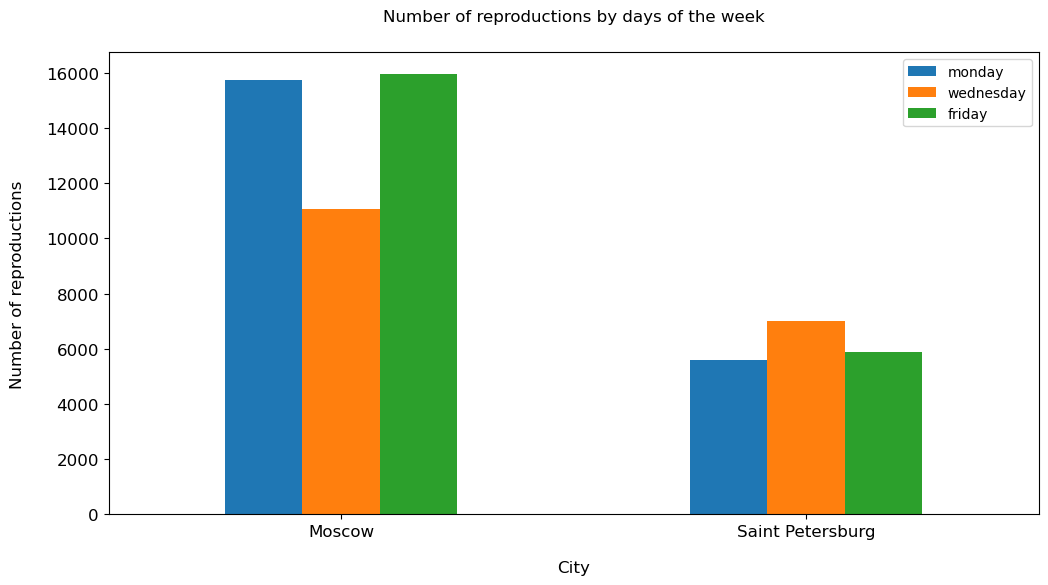

In [23]:
days_table.plot(kind='bar', figsize = (12,6))
plt.title('Number of reproductions by days of the week', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('City', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

**Conclusions**

The data shows the difference in user behavior:

- In Moscow, the peak of listening is on Monday and Friday, and on Wednesday there is a noticeable decline.
- In St. Petersburg, on the contrary, they listen to music more on Wednesdays. Activity on Monday and Friday here is almost equally inferior to Wednesday.

This means that the data speaks in favor of the first hypothesis.

### Music at the beginning and end of the week
Hypotheses 2: on Monday morning in Moscow some genres prevail, and in St. Petersburg others. Likewise, on Friday evenings, different genres predominate, depending on the city.

In [24]:
moscow_general = data[data['city']=='Moscow']
spb_general = data[data['city']=='Saint-Petersburg']

In [25]:
def genre_weekday(df, day, time1, time2):
 
    genre_df = df[df['time']>= time1]
    genre_df = genre_df[genre_df['time']<=time2]
    genre_df = genre_df[genre_df['day'] == day]

    genre_df_grouped = genre_df.groupby('genre')['genre'].count()
    genre_df_sorted =  genre_df_grouped.sort_values(ascending=False)
    return genre_df_sorted[:10]

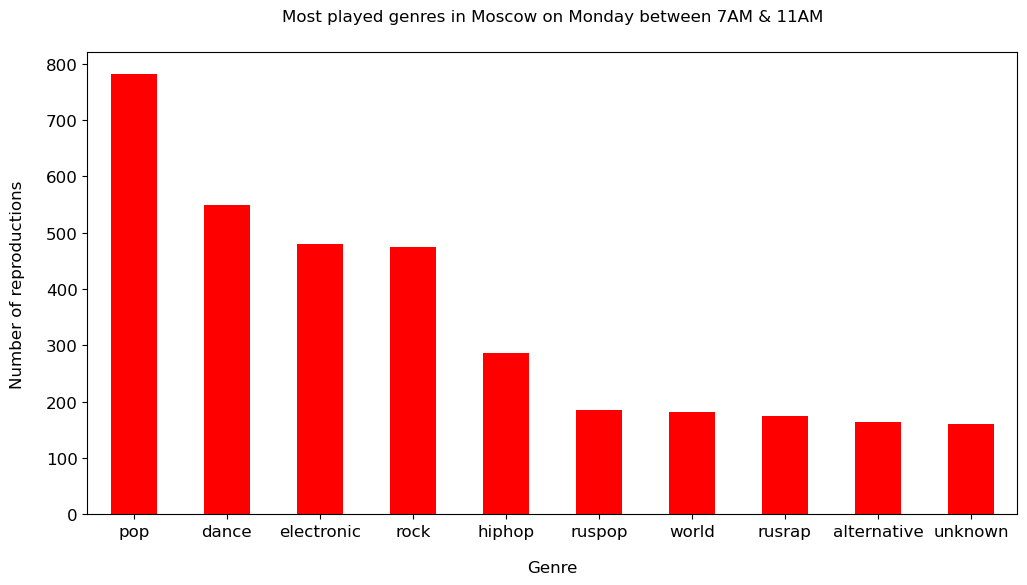

In [26]:
genre_weekday(moscow_general, 'Monday', '07:00', '11:00').plot(kind='bar', figsize = (12,6), color = 'red')
plt.title('Most played genres in Moscow on Monday between 7AM & 11AM', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

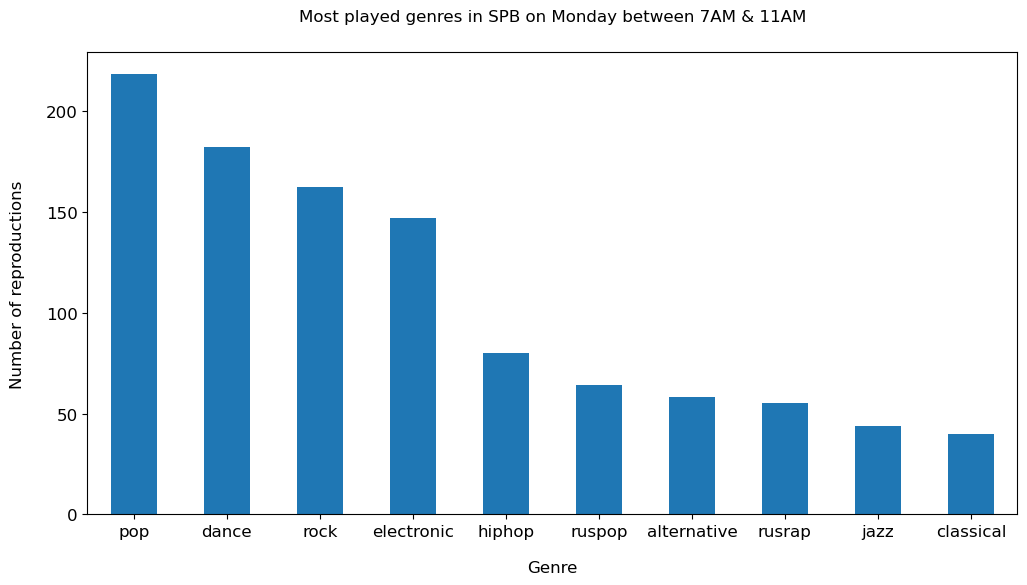

In [27]:
genre_weekday(spb_general, 'Monday', '07:00', '11:00').plot(kind='bar', figsize = (12,6))
plt.title('Most played genres in SPB on Monday between 7AM & 11AM', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

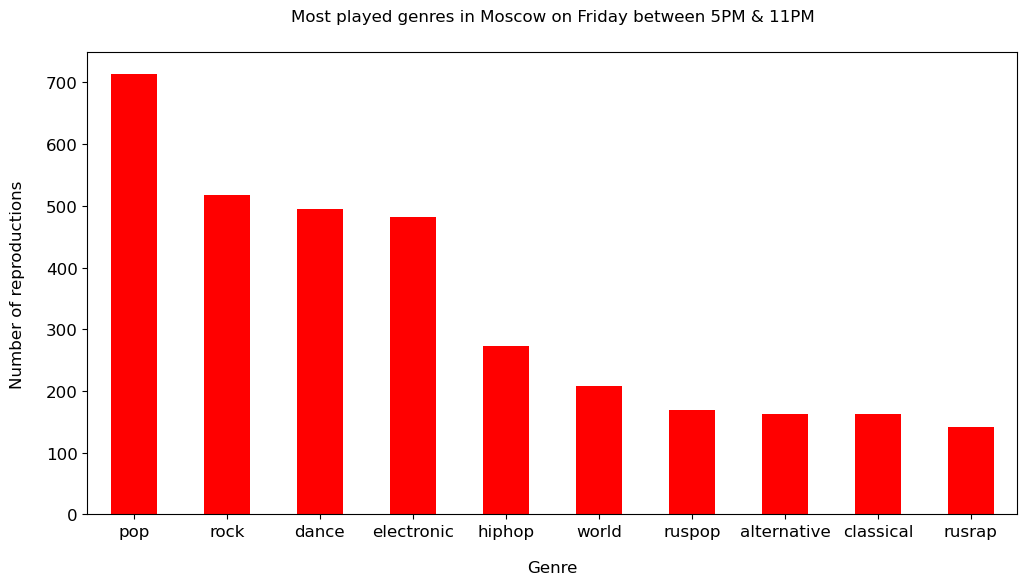

In [28]:
genre_weekday(moscow_general, 'Friday', '17:00', '23:00').plot(kind='bar', figsize = (12,6), color = 'red')
plt.title('Most played genres in Moscow on Friday between 5PM & 11PM', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

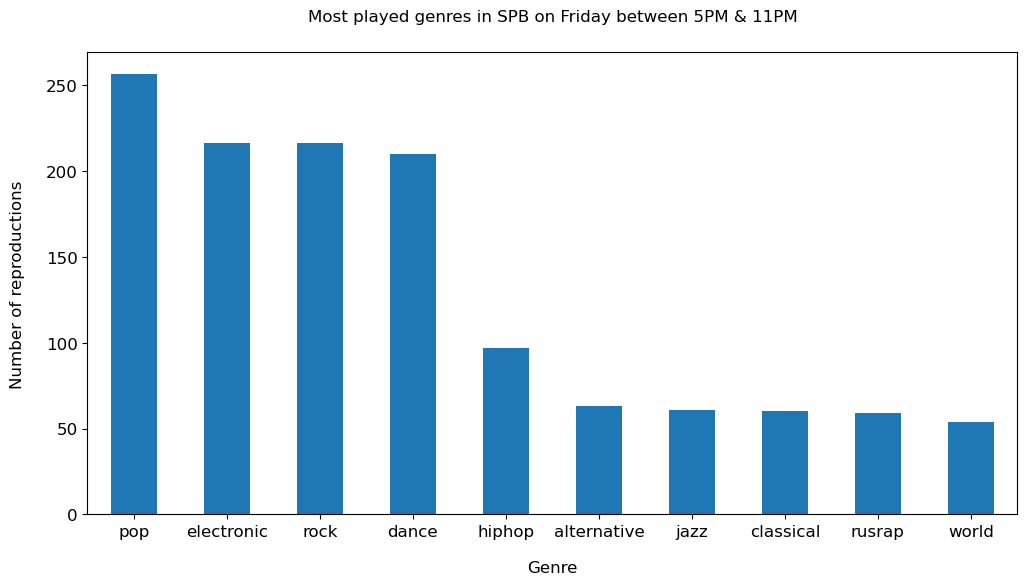

In [29]:
genre_weekday(spb_general, 'Friday', '17:00', '23:00').plot(kind='bar', figsize = (12,6))
plt.title('Most played genres in SPB on Friday between 5PM & 11PM', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

**Conclusions**

If we compare the top 10 genres on Monday morning, we can draw the following conclusions:

1. People listen to similar music in Moscow and St. Petersburg.

2. In Moscow there were so many missing values that the value `'unknown'` took tenth place among the most popular genres. This means that missing values occupy a significant proportion of the data and threaten the reliability of the study.

Friday evening does not change this picture. Some genres go a little higher, others go down, but overall the top 10 remains the same.

Thus, the second hypothesis was only partially confirmed:
* Users listen to similar music at the beginning of the week and at the end.
* The difference between Moscow and St. Petersburg is not very pronounced. In Moscow people listen to Russian popular music more often, in St. Petersburg they listen to jazz.

However, gaps in the data cast doubt on this result. There are so many of them in Moscow that the top 10 ranking might look different if not for the lost data on genres.

### Genre preferences in Moscow and St. Petersburg

Hypothesis 3: St. Petersburg is the capital of rap, music of this genre is listened to more often there than in Moscow. And Moscow is a city of contrasts, in which, nevertheless, pop music prevails.

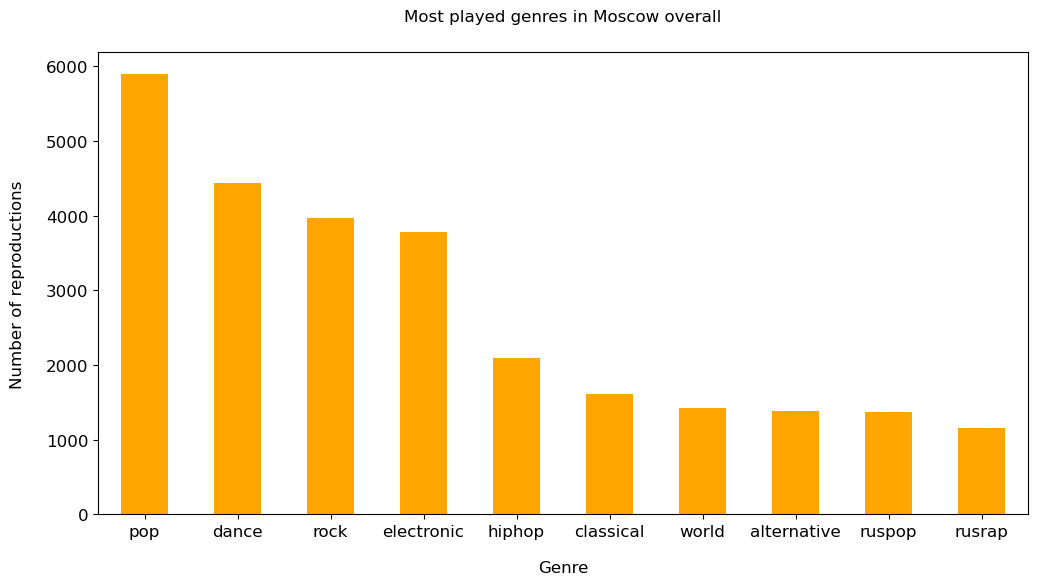

In [30]:
moscow_genres = moscow_general.groupby('genre') ['genre'].count().sort_values(ascending=False)

moscow_genres[:10].plot(kind='bar', figsize = (12,6), color = 'orange')
plt.title('Most played genres in Moscow overall', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')


plt.show()

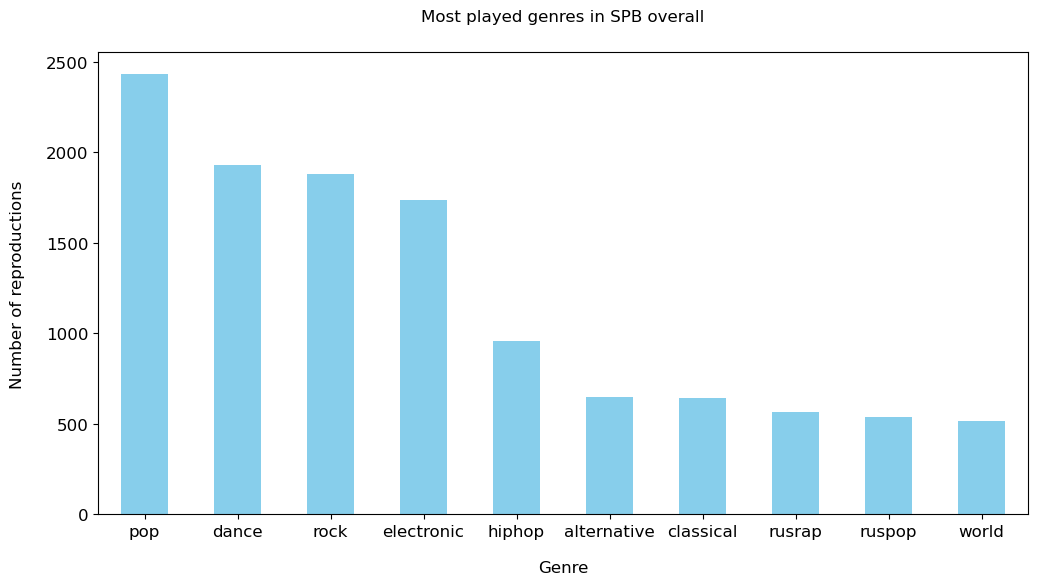

In [31]:
spb_genres = spb_general.groupby('genre')['genre'].count().sort_values(ascending=False)

spb_genres[:10].plot(kind='bar', figsize = (12,6), color = 'skyblue')
plt.title('Most played genres in SPB overall', y= 1.05)
plt.ylabel('Number of reproductions', size = 12, labelpad = 15)
plt.xlabel('Genre', size = 12, labelpad = 15)
plt.tick_params(axis='x', labelrotation=0, labelsize = 'large')
plt.tick_params(axis='y', labelsize = 'large')
plt.show()

The hypothesis was partially confirmed:
* Pop music is the most popular genre in Moscow, as the hypothesis predicted. Moreover, in the top 10 genres there is a similar genre - Russian popular music.
* Contrary to expectations, rap is equally popular in Moscow and St. Petersburg.

## Conclusions of the study

We have tested three hypotheses and found:

1. The days of the week affect user activity differently in Moscow and St. Petersburg.

The first hypothesis was completely confirmed.

2. Musical preferences do not change much during the week - be it Moscow or St. Petersburg. Small differences are noticeable at the beginning of the week, on Mondays:
* in Moscow they listen to music of the `world` genre,
* in St. Petersburg - `jazz` and `classics`.

Thus, the second hypothesis was only partially confirmed. This result might have been different if not for gaps in the data.

3. The tastes of users in Moscow and St. Petersburg have more in common than differences. Contrary to expectations, genre preferences in St. Petersburg resemble those in Moscow.

The third hypothesis was not confirmed. If differences in preferences exist, they are not noticeable for the majority of users.